In [1]:
from Kmeans import *
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = np.genfromtxt("data/bio_train.csv", delimiter=",")[:,3:]
data = MinMaxScaler().fit_transform(data)
labels_true = np.genfromtxt("data/bio_train.csv", delimiter=",")[:,0]

In [7]:
model = Kmeans(k=153, max_iters=300)
model.fit(data)
labels_computed = model.labels_
print(f"NMI: {NMI(labels_true, labels_computed)}")

 80%|███████▉  | 239/300 [06:18<01:36,  1.58s/it]
Kmeans converged. Exiting loop.



NMI: 0.20168405817175408



In [8]:
model.errors[-5:]

[0.0029665852080567596,
 0.001983271340564256,
 0.0018280439730486964,
 0.0008584941152004462,
 0.0008868706163122336]

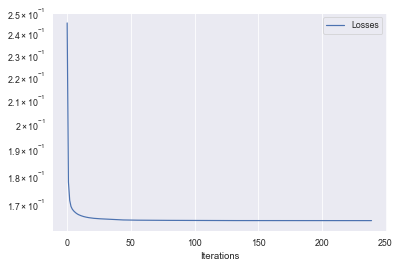

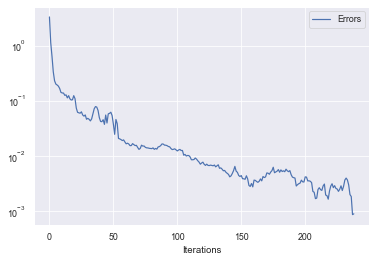

In [15]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set(color_codes=True)
sns.set_context('paper')

plt.yscale("log")
plt.plot(model.losses, label="Losses")
plt.xlabel("Iterations")
plt.legend()
plt.show()
plt.yscale("log")
plt.plot(model.errors, label="Errors")
plt.xlabel("Iterations")
plt.legend()
plt.show()


## Test with different clustering algorithms

In [11]:
from sklearn import cluster 
from sklearn import mixture

In [12]:
start = datetime.now()  # runtime

clustering = cluster.KMeans(n_clusters=153).fit(data)
runtime = datetime.now() - start
print(f"Finished in {runtime}")

clusters_sklearn = clustering.labels_
print(NMI(clusters_sklearn, labels_true))
print(clustering.n_iter_)

Finished in 0:05:30.704607
0.20386431948253614
231


### Agreement between sklearn's and custom kmeans labels

In [13]:
print(NMI(clusters_sklearn, labels_computed)) # not too shabby

0.6092280264380765


In [ ]:

# GaussianMixture
start = datetime.now()  # runtime
clustering = mixture.GaussianMixture(n_components=153)
labels = clustering.fit_predict(data)
runtime = datetime.now() - start
print(f"Finished in {runtime}")

clusters_sklearn = clustering.labels_
print(NMI(labels, clusters_sklearn))


In [ ]:
start = datetime.now()  # runtime

clustering = cluster.DBSCAN(eps=0.3, min_samples=30).fit(data)
runtime = datetime.now() - start
print(f"Finished in {runtime}")

clusters_sklearn = clustering.labels_
print(NMI(labels, clusters_sklearn))


In [ ]:
start = datetime.now()  # runtime

clustering = cluster.AgglomerativeClustering(n_clusters=153).fit(data)
runtime = datetime.now() - start
print(f"Finished in {runtime}")

clusters_sklearn = clustering.labels_
print(NMI(labels, clusters_sklearn))